<a href="https://colab.research.google.com/github/Zayedislam/Network-simulation-with-ns3/blob/master/Image_Classification_Using_Multi_Layer_Perceptron_diseases_type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os


diseases_types = os.listdir('/content/drive/MyDrive/plant_diseases')
print (diseases_types)  

print("Types of diseases found: ", len(diseases_types))

['Potato___healthy', 'Potato___Early_blight', 'Potato___Late_blight']
Types of diseases found:  3


In [2]:
diseases = []

for item in diseases_types:
 # Get all the file names
 all_diseases = os.listdir('/content/drive/MyDrive/plant_diseases' + '/' +item)
 #print(all_shoes)

 # Add them to the list
 for disease in all_diseases:
    diseases.append((item, str('/content/drive/MyDrive/plant_diseases' + '/' +item) + '/' + disease))
    print(diseases[:1])

[('Potato___healthy', '/content/drive/MyDrive/plant_diseases/Potato___healthy/8583c4ff-2d8b-4b6f-89a8-fcc98917ce9b___RS_HL 1961.JPG')]
[('Potato___healthy', '/content/drive/MyDrive/plant_diseases/Potato___healthy/8583c4ff-2d8b-4b6f-89a8-fcc98917ce9b___RS_HL 1961.JPG')]
[('Potato___healthy', '/content/drive/MyDrive/plant_diseases/Potato___healthy/8583c4ff-2d8b-4b6f-89a8-fcc98917ce9b___RS_HL 1961.JPG')]
[('Potato___healthy', '/content/drive/MyDrive/plant_diseases/Potato___healthy/8583c4ff-2d8b-4b6f-89a8-fcc98917ce9b___RS_HL 1961.JPG')]
[('Potato___healthy', '/content/drive/MyDrive/plant_diseases/Potato___healthy/8583c4ff-2d8b-4b6f-89a8-fcc98917ce9b___RS_HL 1961.JPG')]
[('Potato___healthy', '/content/drive/MyDrive/plant_diseases/Potato___healthy/8583c4ff-2d8b-4b6f-89a8-fcc98917ce9b___RS_HL 1961.JPG')]
[('Potato___healthy', '/content/drive/MyDrive/plant_diseases/Potato___healthy/8583c4ff-2d8b-4b6f-89a8-fcc98917ce9b___RS_HL 1961.JPG')]
[('Potato___healthy', '/content/drive/MyDrive/plant_dis

In [3]:
# Build a dataframe        
diseases_df = pd.DataFrame(data=diseases, columns=['diseases type', 'image'])
print(diseases_df.head())
print(diseases_df.tail())

      diseases type                                              image
0  Potato___healthy  /content/drive/MyDrive/plant_diseases/Potato__...
1  Potato___healthy  /content/drive/MyDrive/plant_diseases/Potato__...
2  Potato___healthy  /content/drive/MyDrive/plant_diseases/Potato__...
3  Potato___healthy  /content/drive/MyDrive/plant_diseases/Potato__...
4  Potato___healthy  /content/drive/MyDrive/plant_diseases/Potato__...
             diseases type                                              image
1102  Potato___Late_blight  /content/drive/MyDrive/plant_diseases/Potato__...
1103  Potato___Late_blight  /content/drive/MyDrive/plant_diseases/Potato__...
1104  Potato___Late_blight  /content/drive/MyDrive/plant_diseases/Potato__...
1105  Potato___Late_blight  /content/drive/MyDrive/plant_diseases/Potato__...
1106  Potato___Late_blight  /content/drive/MyDrive/plant_diseases/Potato__...


In [4]:
# Let's check how many samples for each category are present
print("Total number of diseases in the dataset: ", len(diseases_df))

Total number of diseases in the dataset:  1107


In [5]:
diseases_count = diseases_df['diseases type'].value_counts()

print("diseases in each category: ")
print(diseases_count)


diseases in each category: 
Potato___Late_blight     494
Potato___Early_blight    461
Potato___healthy         152
Name: diseases type, dtype: int64


In [8]:
import cv2
path = '/content/drive/MyDrive/plant_diseases/'


#im_size = 100
im_size = 300

images = []
labels = []

for i in diseases_types:
    data_path = path + str(i) 
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)  # reading that image as array
        #print(img)  # will get the image as an array
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [9]:
# Transform the image array to a numpy type

images = np.array(images)

images.shape

(1107, 300, 300, 3)

In [10]:
images = images.astype('float32') / 255.0

In [11]:
images.shape

(1107, 300, 300, 3)

In [13]:


from sklearn.preprocessing import LabelEncoder , OneHotEncoder


y=diseases_df['diseases type'].values
print(y[:5])



['Potato___healthy' 'Potato___healthy' 'Potato___healthy'
 'Potato___healthy' 'Potato___healthy']


In [14]:
# for y
y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)


[2 2 2 ... 1 1 1]


In [15]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, y = shuffle(images, y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1051, 300, 300, 3)
(1051,)
(56, 300, 300, 3)
(56,)


In [16]:
# Develop a sequential model using tensorflow keras
import keras
import tensorflow as tf
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(300,300,3)),
    keras.layers.Dense(256, activation=tf.nn.tanh),
   
    keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 270000)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               69120256  
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 771       
Total params: 69,121,027
Trainable params: 69,121,027
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compute the model parameters

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# Train the model  with 5 epochs 

model.fit(train_x,train_y, epochs=5)


Epoch 1/5
33/33 [==============================] - 16s 445ms/step - loss: 10.9971 - accuracy: 0.3983
Epoch 2/5
33/33 [==============================] - 15s 448ms/step - loss: 3.1153 - accuracy: 0.4131
Epoch 3/5
33/33 [==============================] - 15s 446ms/step - loss: 1.0982 - accuracy: 0.4065
Epoch 4/5
33/33 [==============================] - 15s 450ms/step - loss: 1.0120 - accuracy: 0.4446
Epoch 5/5
33/33 [==============================] - 15s 446ms/step - loss: 0.9995 - accuracy: 0.4026


In [21]:


y_pred = model.predict_classes(test_x)
y_pred



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

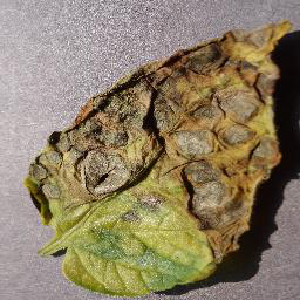

In [28]:
from keras.preprocessing.image import load_img

import numpy as np

image = load_img('/content/drive/MyDrive/test_data/0e6b9e09-2bcd-41e0-b001-b80a33a8a78b___RS_Early.B 8694.JPG', target_size=(300, 300))   # predicting correct 
image

In [29]:
# convert the image pixels to a numpy array
image = np.array(image)
image.shape

# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [30]:
yhat = model.predict(image)
yhat

array([[0.4838376 , 0.39378452, 0.1223779 ]], dtype=float32)